# Nature Data Exploration

Nature 1 is just a sunset time
Nature 2 is stream flowing
Nature 3 is waterfall in a tropical forest but very intensely
Nature 4 is night time in tropical island with insects

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import HTML

In [2]:
# Load nature feature data
nature_df = pd.read_csv("../features/nature/extracted-features.csv")
nature_df = nature_df.sort_values(by=['source', 'filename']).reset_index(drop=True)
print(nature_df.head())

     source         filename       rms     centroid  flatness    bandwidth  \
0  nature-1  segment-001.wav  0.013939  1479.445718  0.000099  1970.091996   
1  nature-1  segment-002.wav  0.009931  1384.127487  0.000129  2091.619435   
2  nature-1  segment-003.wav  0.010578  1423.750928  0.000115  2063.296742   
3  nature-1  segment-004.wav  0.012060  1402.445220  0.000099  2032.998023   
4  nature-1  segment-005.wav  0.021046  1208.686290  0.000057  1946.586277   

        zcr  envelope  onset_density        ioi  
0  0.051360  0.017633       0.800000  51.739130  
1  0.042492  0.012568       3.466667  17.951456  
2  0.046668  0.013354       1.433333  44.428571  
3  0.043809  0.015305       3.666667  17.165138  
4  0.027329  0.027112       1.200000  51.028571  


# 1.0 Feature Selection

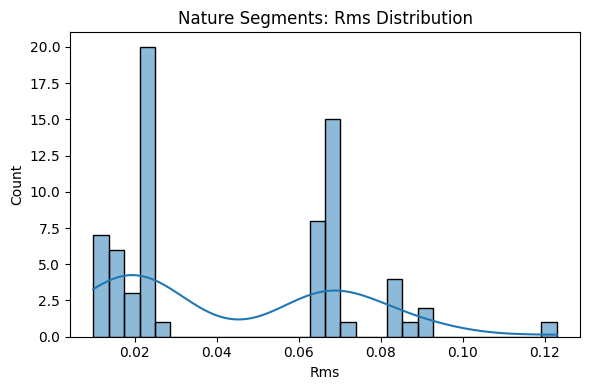

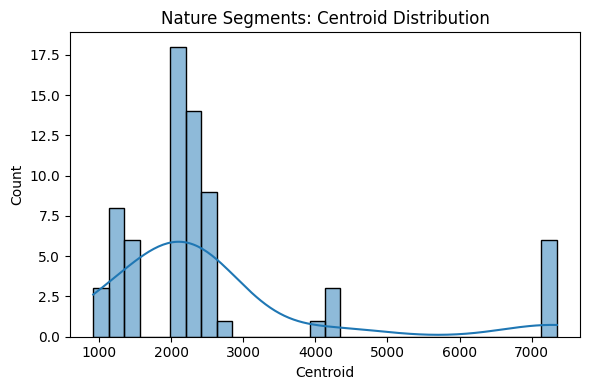

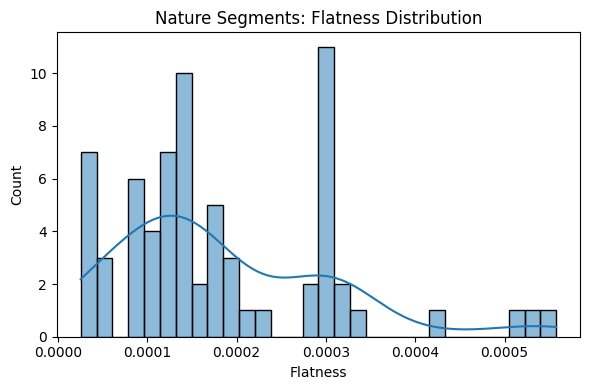

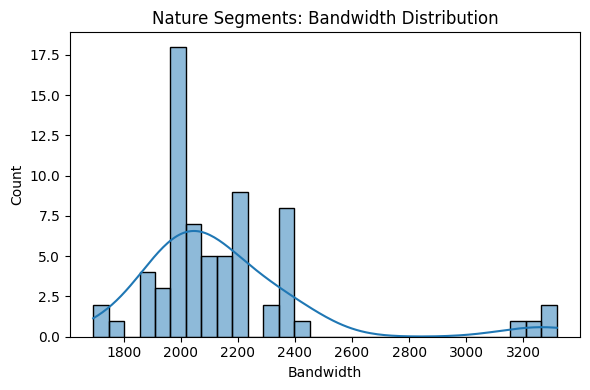

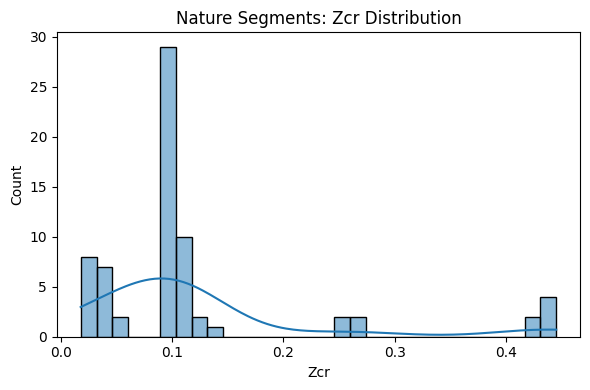

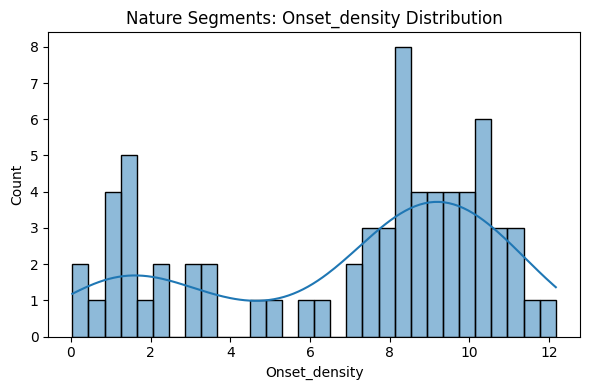

In [3]:
features_to_plot = [
    'rms', 'centroid', 'flatness',
    'bandwidth','zcr', 'onset_density'
]

for feature in features_to_plot:
    plt.figure(figsize=(6, 4))
    sns.histplot(nature_df[feature], bins=30, kde=True)
    plt.title(f"Nature Segments: {feature.capitalize()} Distribution")
    plt.xlabel(feature.capitalize())
    plt.ylabel("Count")
    plt.tight_layout()
    output_path = f"../data/plots/nature/combined-{feature}-distribution.png"
    plt.savefig(output_path)

# Features Separated by Nature File 

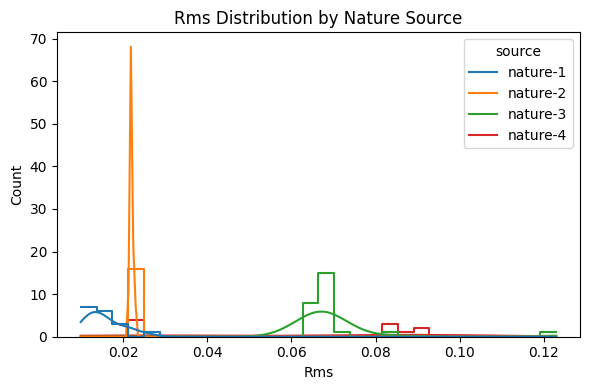

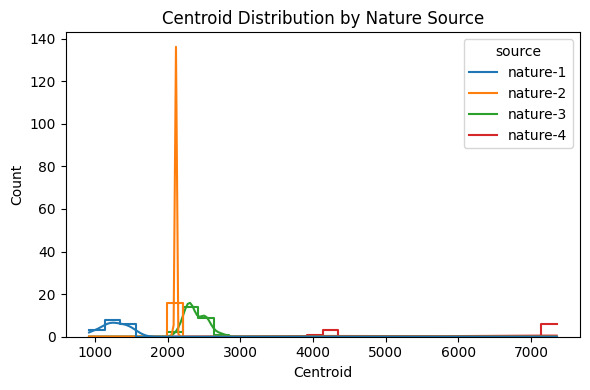

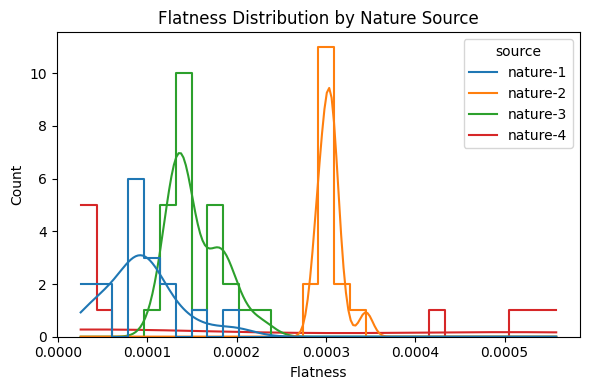

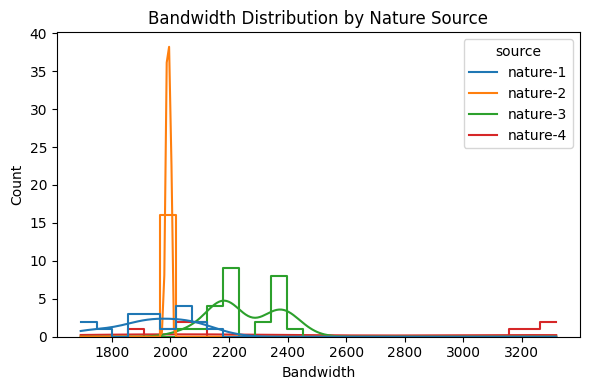

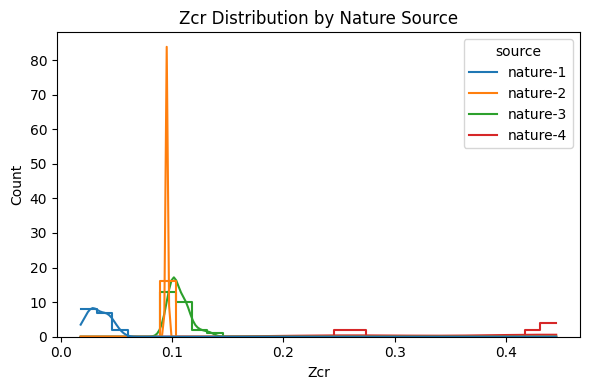

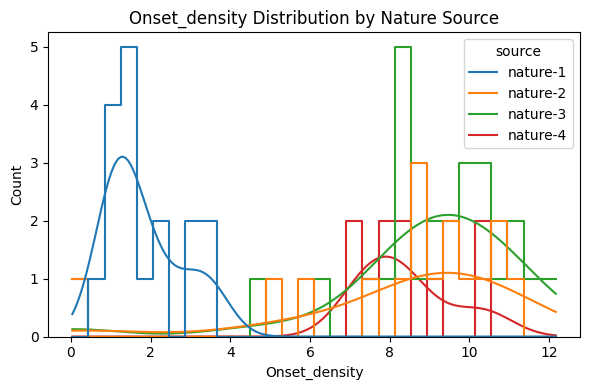

In [4]:
for feature in features_to_plot:
    plt.figure(figsize=(6, 4))
    sns.histplot(
        data=nature_df,
        x=feature,
        hue='source',
        bins=30,
        kde=True,
        palette="tab10",
        element="step",
        fill=False
    )
    plt.title(f"{feature.capitalize()} Distribution by Nature Source")
    plt.xlabel(feature.capitalize())
    plt.ylabel("Count")
    plt.tight_layout()
    output_path = f"../data/plots/nature/{feature}-distribution.png"
    plt.savefig(output_path)


# Features For Each Nature Scene

Nature Source: nature-1 (17 segments)
Nature Source: nature-2 (16 segments)
Nature Source: nature-3 (26 segments)
Nature Source: nature-4 (10 segments)


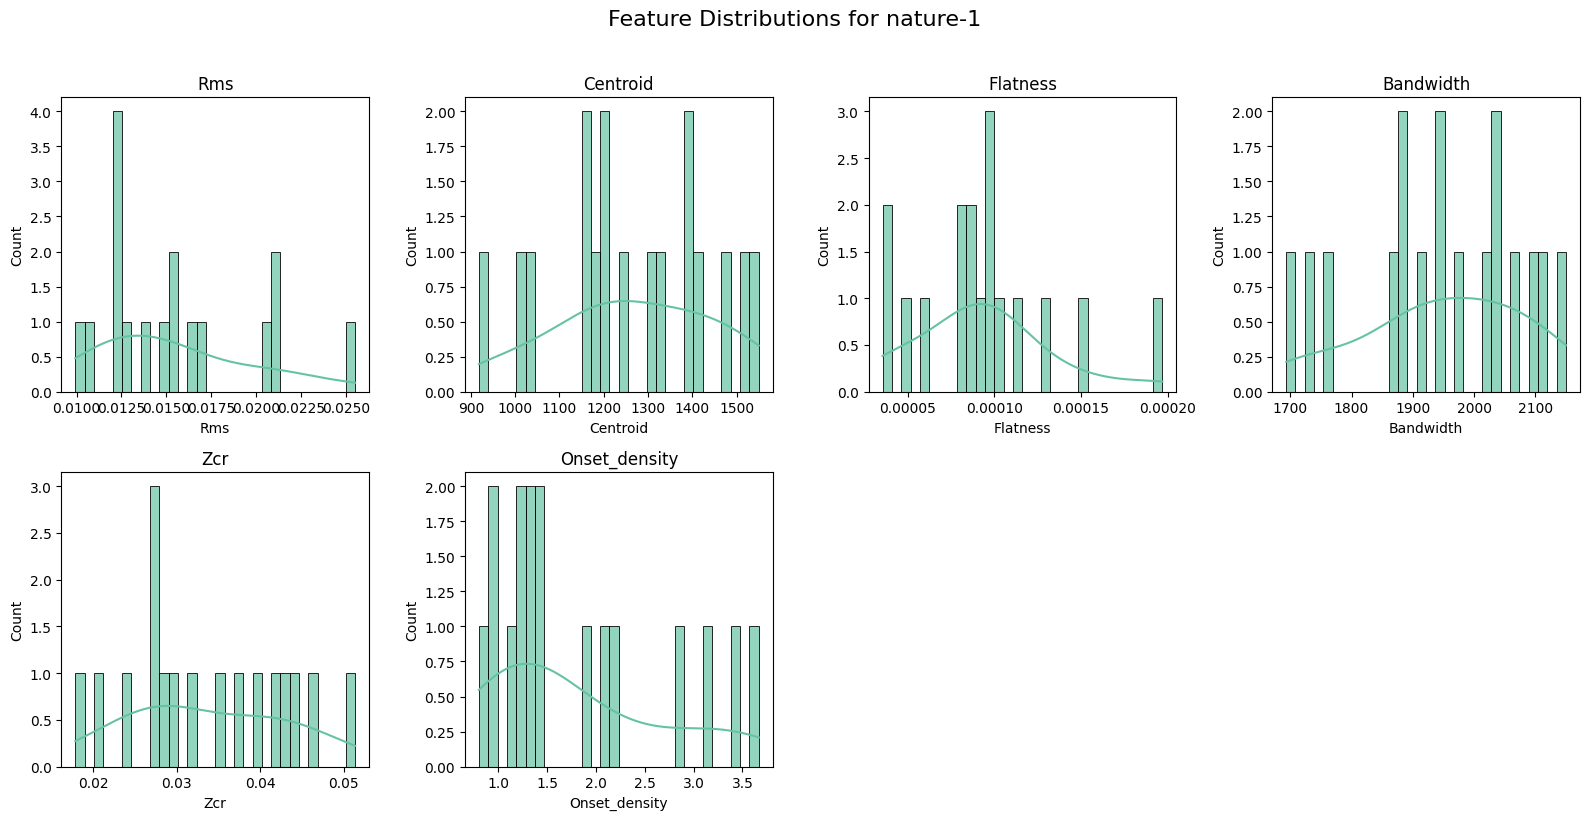

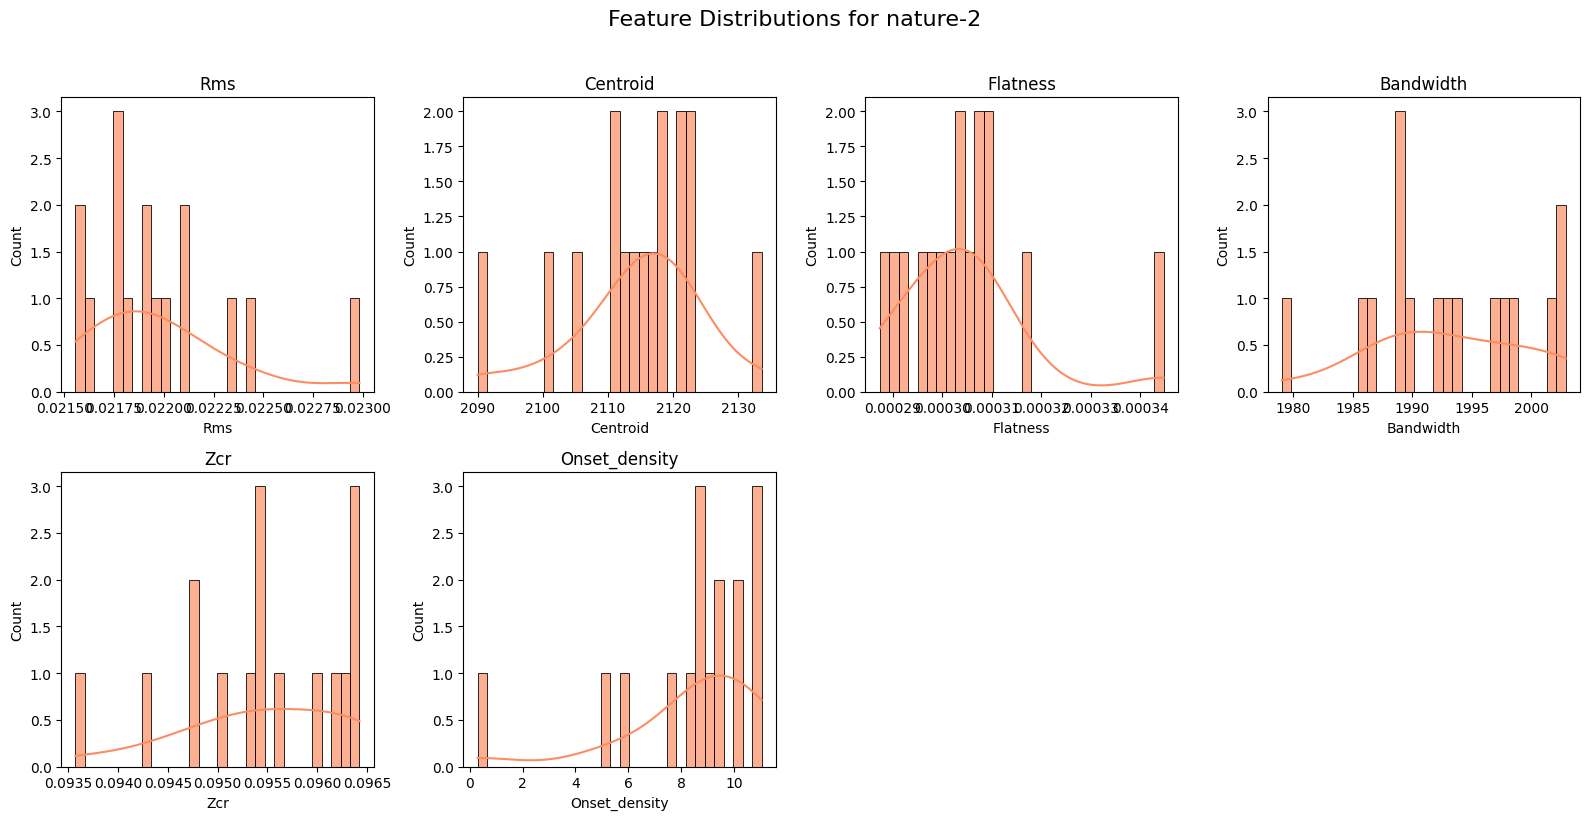

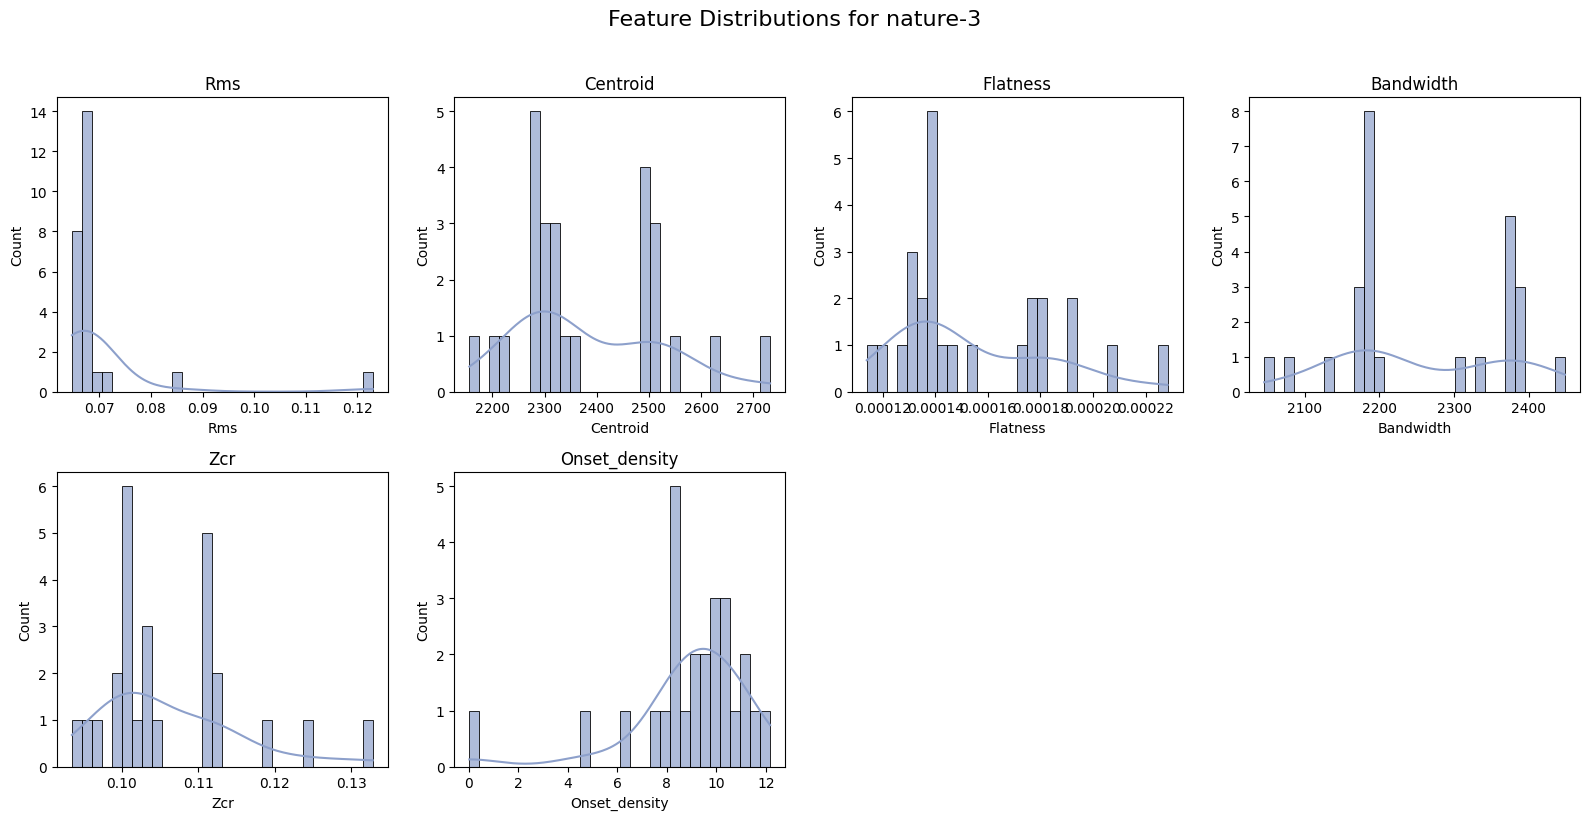

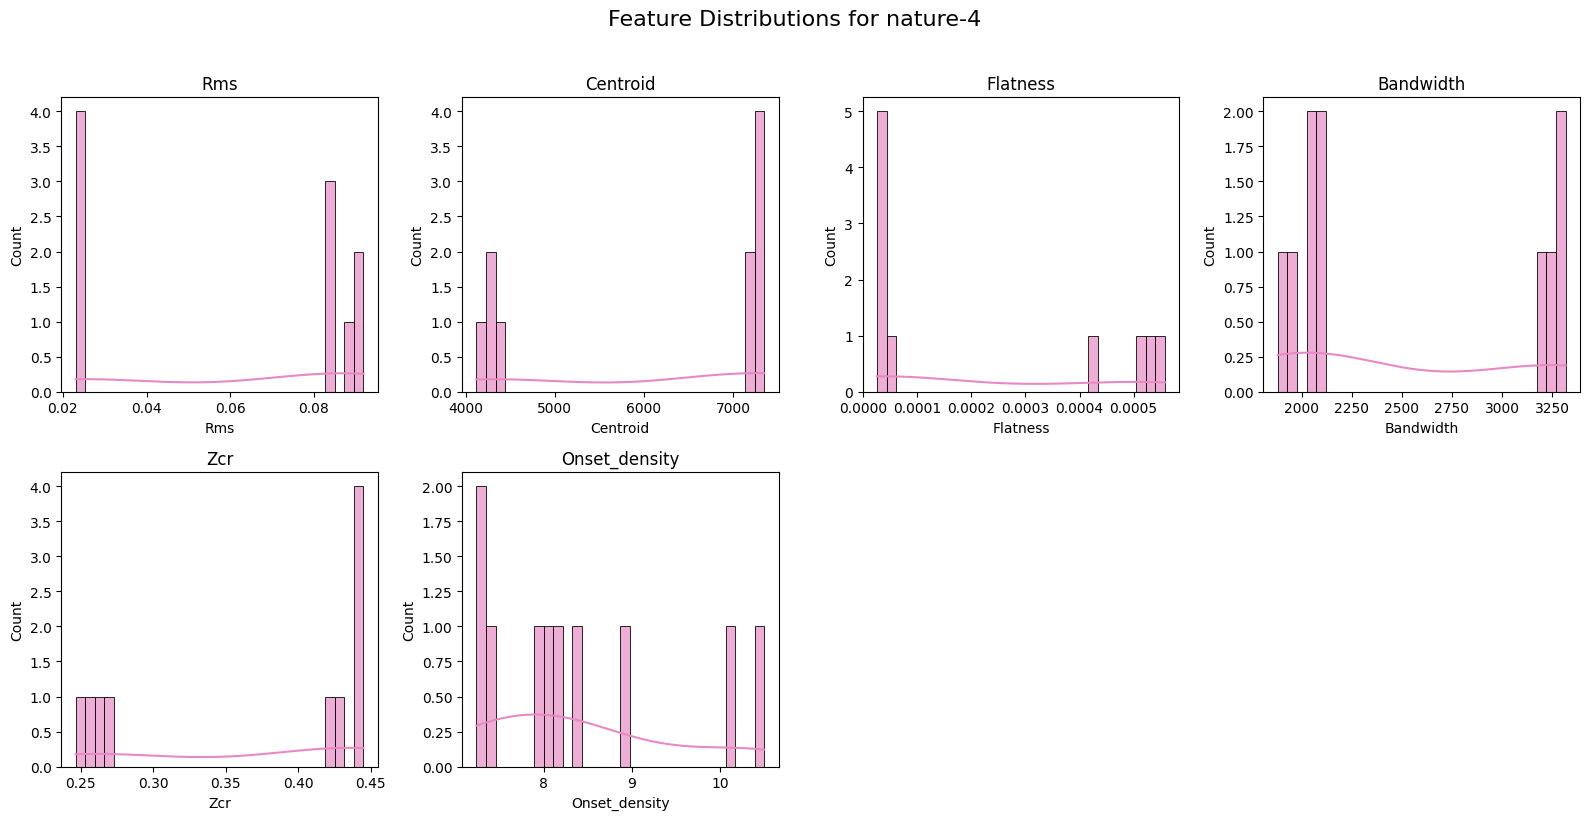

In [5]:
# Choose a color palette (one color for each source)
source_colors = sns.color_palette("Set2", n_colors=len(nature_df['source'].unique()))

for idx, nature_source in enumerate(nature_df['source'].unique()):
    subset_df = nature_df[nature_df['source'] == nature_source]
    color = source_colors[idx]
    
    print(f"Nature Source: {nature_source} ({len(subset_df)} segments)")

    # Create a grid of subplots
    fig, axes = plt.subplots(2, 4, figsize=(16, 8))
    fig.suptitle(f"Feature Distributions for {nature_source}", fontsize=16, y=1.02)

    # Loop over features and axes
    for ax, feature in zip(axes.flat, features_to_plot):
        sns.histplot(
            subset_df[feature],
            bins=30,
            kde=True,
            color=color,  # Use the same color for the whole source
            alpha=0.7,
            ax=ax
        )
        ax.set_title(feature.capitalize())
        ax.set_xlabel(feature.capitalize())
        ax.set_ylabel("Count")

    # Remove any empty subplots if features_to_plot has fewer than 8
    for ax in axes.flat[len(features_to_plot):]:
        ax.set_visible(False)

    plt.tight_layout()
    output_path = f"../data/plots/nature/{nature_source}-features.png"
    plt.savefig(output_path)

# Table of Sounds Associated with Features

#### Nature 1:
segment-001.wav has birds chirping
segment-001.wav fairly quiet

#### Nature 2
segment-001.wav consistant flow

#### Nature 3
segment 009 consistant swaterfall

#### nature-4 
segment-001 very high pitch insect
segment-008 low insect

In [6]:
# Identify interesting rows (extreme values for demonstration)
loudest = nature_df.loc[nature_df['rms'].idxmax()]
softest = nature_df.loc[nature_df['rms'].idxmin()]
brightest = nature_df.loc[nature_df['centroid'].idxmax()]
dullest = nature_df.loc[nature_df['centroid'].idxmin()]
noisiest = nature_df.loc[nature_df['flatness'].idxmax()]
smoothest = nature_df.loc[nature_df['flatness'].idxmin()]

# Add a "notes" field to each row
interesting_segments = [
    (loudest, "Loudest segment (highest RMS)"),
    (softest, "Softest segment (lowest RMS)"),
    (brightest, "Brightest segment (highest centroid)"),
    (dullest, "Dullest segment (lowest centroid)"),
    (noisiest, "Noisiest segment (highest flatness)"),
    (smoothest, "Smoothest segment (lowest flatness)")
]

# Create an HTML table with playable audio
table_html = "<table border='1'><tr><th>Segment</th><th>RMS</th><th>Centroid</th><th>Flatness</th><th>Notes</th><th>Play</th></tr>"
for row, note in interesting_segments:
    audio_path = f"../data/processed/nature/{row['source']}/{row['filename']}"
    audio_html = f"<audio controls src='{audio_path}'></audio>"
    table_html += (
        f"<tr><td>{row['source']}/{row['filename']}</td>"
        f"<td>{row['rms']:.4f}</td>"
        f"<td>{row['centroid']:.1f}</td>"
        f"<td>{row['flatness']:.4f}</td>"
        f"<td>{note}</td>"
        f"<td>{audio_html}</td></tr>"
    )
table_html += "</table>"

# Display in the notebook
HTML(table_html)


Segment,RMS,Centroid,Flatness,Notes,Play
nature-3/segment-016.wav,0.1230,2554.5,0.0001,Loudest segment (highest RMS),
nature-1/segment-002.wav,0.0099,1384.1,0.0001,Softest segment (lowest RMS),
nature-4/segment-004.wav,0.0849,7349.9,0.0000,Brightest segment (highest centroid),
nature-1/segment-011.wav,0.0212,918.2,0.0000,Dullest segment (lowest centroid),
nature-4/segment-009.wav,0.0230,4332.3,0.0006,Noisiest segment (highest flatness),
nature-4/segment-005.wav,0.0850,7309.5,0.0000,Smoothest segment (lowest flatness),


Feature values for nature-4/segment-006.wav:


,rms,centroid,flatness,bandwidth,zcr,envelope,onset_density,ioi
50,0.084447,7307.407985,0.000048,2100.419431,0.442881,0.104469,8.166667,7.631148


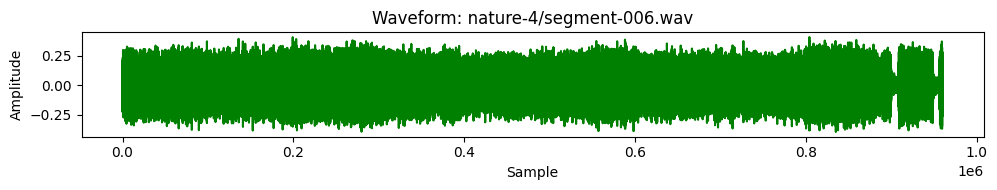

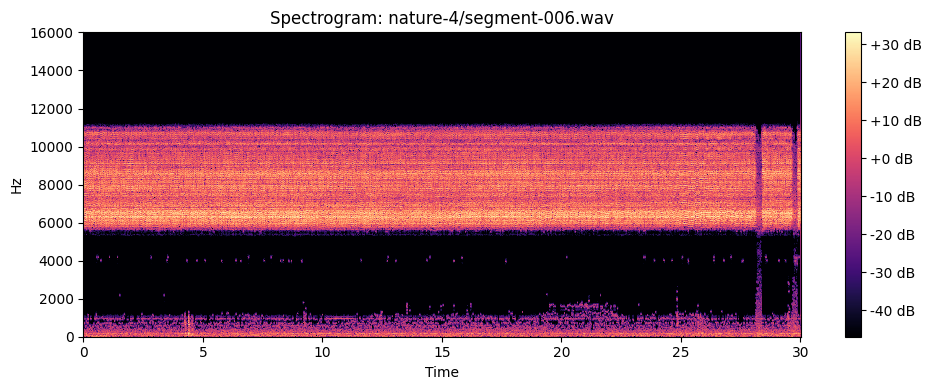

Feature values for nature-1/segment-007.wav:


,rms,centroid,flatness,bandwidth,zcr,envelope,onset_density,ioi
68,0.012334,1518.556478,0.000152,2150.086736,0.039788,0.015546,1.1,49.65625


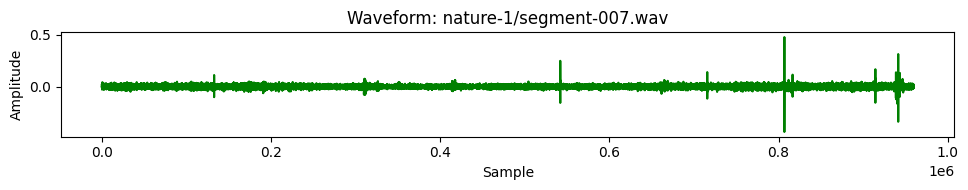

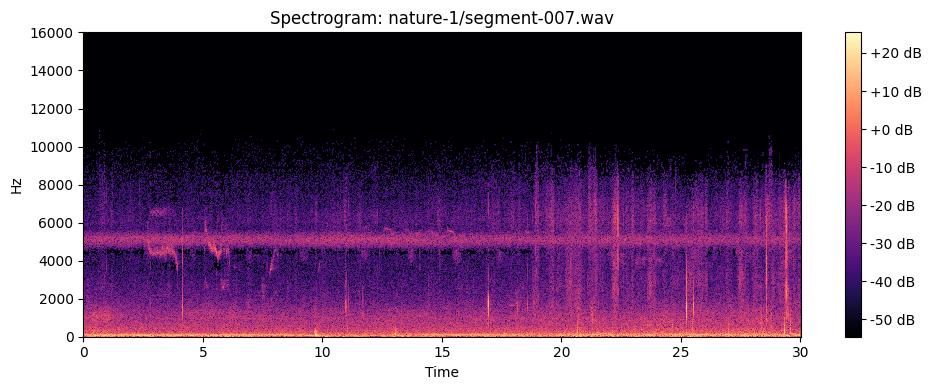

Feature values for nature-4/segment-004.wav:


,rms,centroid,flatness,bandwidth,zcr,envelope,onset_density,ioi
48,0.08488,7349.913993,0.000027,2030.234554,0.443034,0.105569,7.966667,7.865546


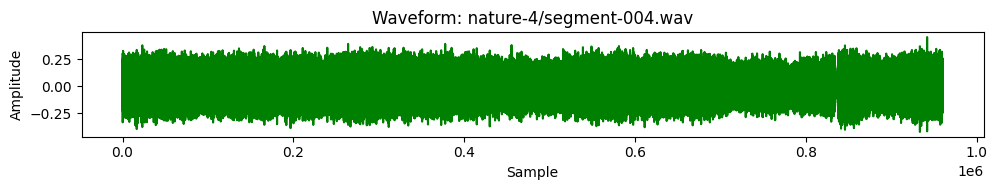

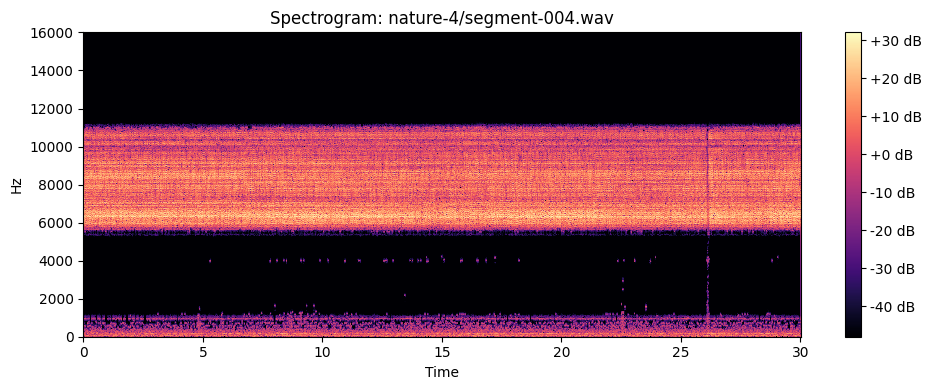

Feature values for nature-1/segment-011.wav:


,rms,centroid,flatness,bandwidth,zcr,envelope,onset_density,ioi
61,0.021188,918.180983,0.000036,1693.269031,0.017873,0.027091,1.366667,46.4


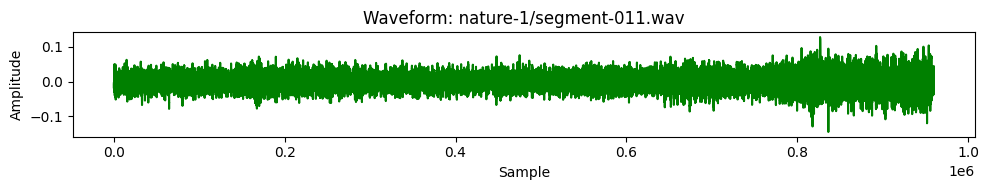

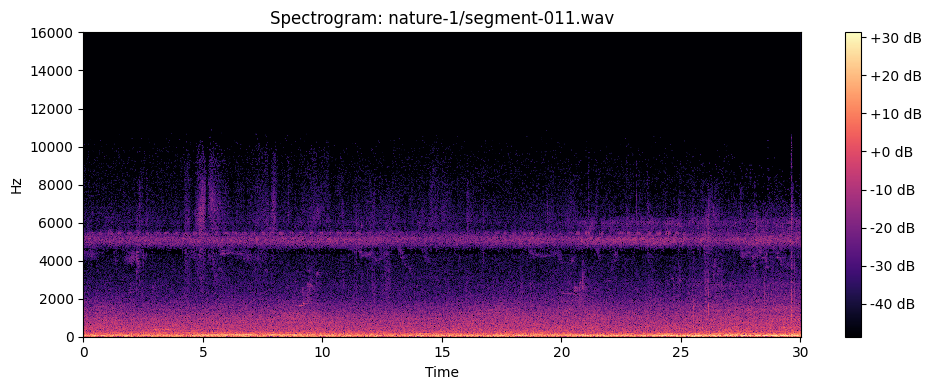

Feature values for nature-4/segment-009.wav:


,rms,centroid,flatness,bandwidth,zcr,envelope,onset_density,ioi
42,0.023049,4332.277182,0.000558,3248.623208,0.266372,0.028931,8.066667,7.742739


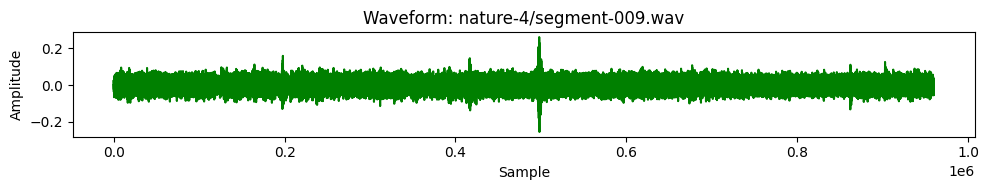

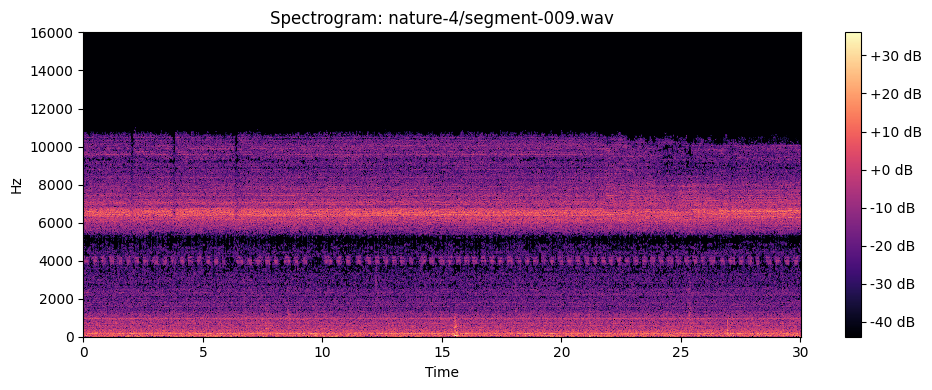

Feature values for nature-4/segment-005.wav:


,rms,centroid,flatness,bandwidth,zcr,envelope,onset_density,ioi
47,0.084978,7309.489367,0.000026,2098.233296,0.441371,0.10535,8.933333,7.007491


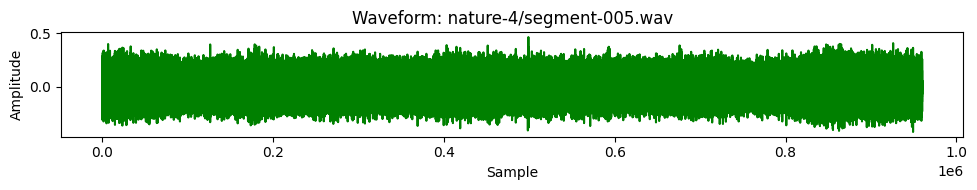

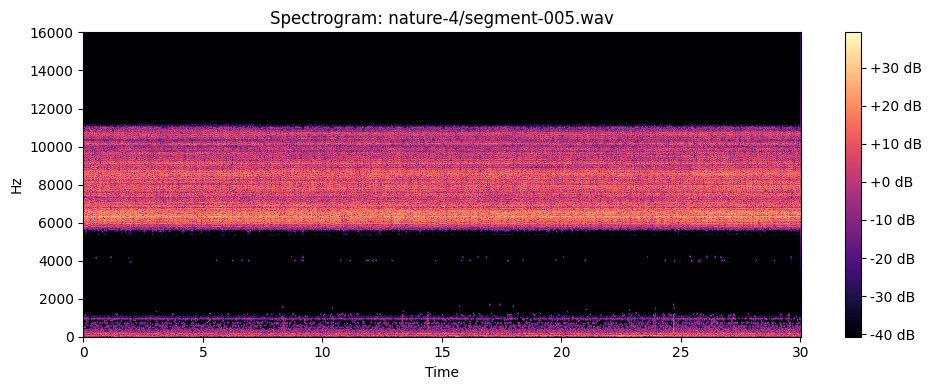

In [7]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
from IPython.display import HTML, display

# Example list of nature segments to visualize
# Adjust to your actual segment names!
selected_segments = [
    ("nature-4", "segment-006.wav"),
    ("nature-1", "segment-007.wav"),
    ("nature-4", "segment-004.wav"),
    ("nature-1", "segment-011.wav"),
    ("nature-4", "segment-009.wav"),
    ("nature-4", "segment-005.wav")
]

# Load the nature features CSV
nature_df = pd.read_csv("../features/nature/extracted-features.csv")

for source, seg_name in selected_segments:
    audio_path = f"../data/processed/nature/{source}/{seg_name}"
    
    # Load audio
    y, sr = librosa.load(audio_path, sr=None)
    
    # Display audio player
    audio_html = f"<audio controls src='{audio_path}'></audio>"
    display(HTML(audio_html))
    
    # Display feature values
    segment_features = nature_df[
        (nature_df['source'] == source) & (nature_df['filename'] == seg_name)
    ]
    print(f"Feature values for {source}/{seg_name}:")
    display(segment_features[[
        'rms', 'centroid', 'flatness', 'bandwidth',
        'zcr', 'envelope', 'onset_density', 'ioi'
    ]])
    
    # Plot waveform
    plt.figure(figsize=(10, 2))
    plt.plot(y, color='green')
    plt.title(f"Waveform: {source}/{seg_name}")
    plt.xlabel("Sample")
    plt.ylabel("Amplitude")
    plt.tight_layout()
    plt.show()
    
    # Plot spectrogram
    plt.figure(figsize=(10, 4))
    S = librosa.stft(y)
    S_db = librosa.amplitude_to_db(abs(S))
    librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='hz', cmap='magma')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f"Spectrogram: {source}/{seg_name}")
    plt.tight_layout()
    plt.show()
